In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

In [2]:
mushrooms = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [22]:
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [23]:
mushrooms_x = mushrooms.drop(['class'], axis=1)
mushrooms_y = mushrooms['class']

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(random_state=0)

In [27]:
params = {'n_estimators': range(10, 50, 10), 'max_depth': range(1, 12, 2), 'min_samples_leaf': range(1, 7), 'min_samples_split': range(2, 9 ,2)}

In [28]:
rf.fit(mushrooms_x, mushrooms_y)

RandomForestClassifier(random_state=0)

In [29]:
grid_rf = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)

In [30]:
grid_rf.fit(mushrooms_x, mushrooms_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [31]:
grid_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [32]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [33]:
best_grid_rf = grid_rf.best_estimator_

In [34]:
feature_importances = best_grid_rf.feature_importances_

In [35]:
feature_importances_df = pd.DataFrame({'features': list(mushrooms_x),
                                      'feature_importances': feature_importances})

In [36]:
feature_importances_df

,features,feature_importances
0,cap-shape,0.002577
1,cap-surface,0.003130
2,cap-color,0.021773
3,bruises,0.070109
4,odor,0.188376
5,gill-attachment,0.000000
6,gill-spacing,0.080840
7,gill-size,0.068461
8,gill-color,0.103861
9,stalk-shape,0.007563


<AxesSubplot:>

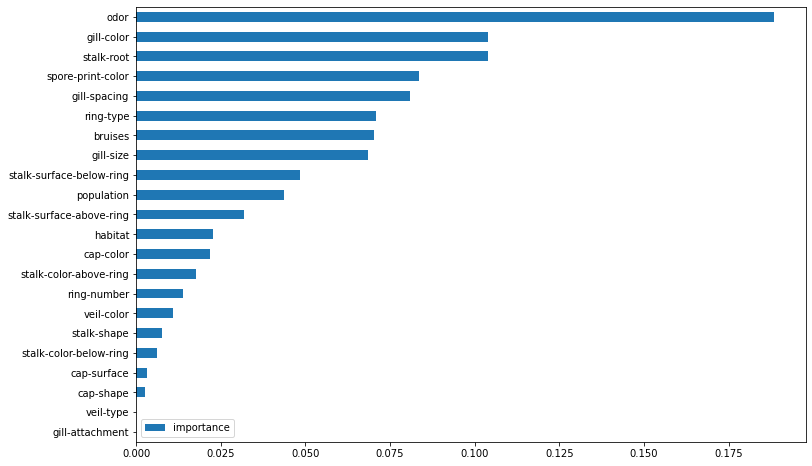

In [96]:
imp = pd.DataFrame(best_grid_rf.feature_importances_, index=mushrooms_x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [39]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [40]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [45]:
counts = best_grid_rf.predict(test)

In [44]:
from collections import Counter

In [46]:
Counter(counts)

Counter({0: 1055, 1: 976})

In [47]:
pd.Series(counts).value_counts()

0    1055
1     976
dtype: int64

In [57]:
np.bincount(counts)[1]

976

In [60]:
list(counts).count(1)

976

In [63]:
testing_y_mush = pd.read_csv('testing_y_mush.csv')

<AxesSubplot:>

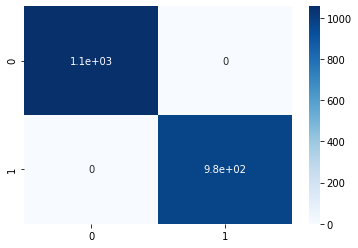

In [72]:
sns.heatmap(confusion_matrix(testing_y_mush, counts), annot=True, cmap="Blues")

In [73]:
mankind = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [74]:
mankind.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [75]:
ships = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [76]:
ships.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [77]:
mankind_x = mankind.drop(['class'], axis=1)
mankind_y = mankind['class']

In [79]:
rf.fit(mankind_x, mankind_y)

RandomForestClassifier(random_state=0)

In [87]:
best_rf = grid_rf1.best_estimator_

In [82]:
grid_rf1 = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)

In [85]:
grid_rf1.fit(mankind_x, mankind_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [90]:
ships_predict = best_rf.predict(ships)

In [91]:
Counter(ships_predict)

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})

In [92]:
feature_importances1 = best_rf.feature_importances_

In [93]:
feature_importances_df1 = pd.DataFrame({'features': list(mankind_x),
                                      'feature_importances': feature_importances1})

<AxesSubplot:>

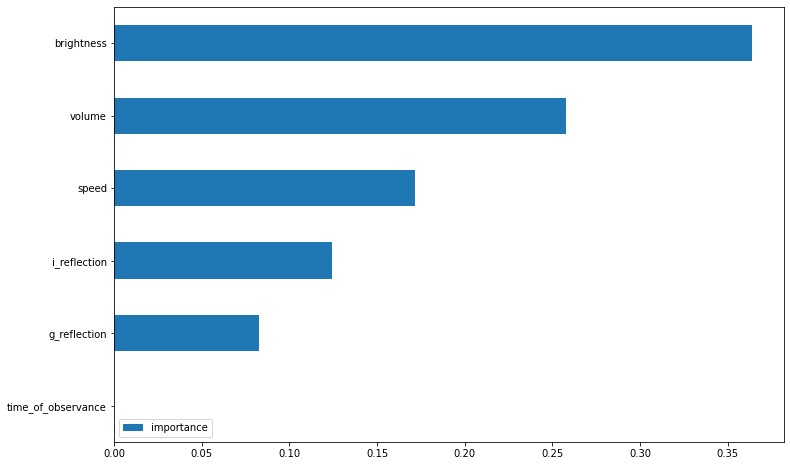

In [95]:
imp1 = pd.DataFrame(feature_importances1, index=mankind_x.columns, columns=['importance'])
imp1.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [97]:
space_danger = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [117]:
space_danger.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [110]:
space_danger_x = space_danger.drop(['dangerous'], axis=1)
space_danger_y = space_danger.dangerous

In [111]:
rf.fit(space_danger_x, space_danger_y)

RandomForestClassifier(random_state=0)

In [112]:
rf_random = RandomizedSearchCV(rf, param_distributions=params, cv=5)

In [113]:
rf_random.fit(space_danger_x, space_danger_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': range(1, 12, 2),
                                        'min_samples_leaf': range(1, 7),
                                        'min_samples_split': range(2, 9, 2),
                                        'n_estimators': range(10, 50, 10)})

In [114]:
best_rf_random_clf = rf_random.best_estimator_

In [115]:
counts = best_rf_random_clf.predict(space_danger_x)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [116]:
space_danger.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
